In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

# Layoffs data file
layoffs_file = Path("Resources/Layoffs.csv")

# Read the Layoffs data
layoffs_data = pd.read_csv(layoffs_file)
layoffs_data_df = layoffs_data

layoffs_data_df['date'] = pd.to_datetime(layoffs_data_df['date'])

# filter data to U.S. between 2021 to 2022
#filtered_data = data[data['country'] == 'United States']
us_layoffs = layoffs_data_df[(layoffs_data_df['country'] == 'United States')]
row_layoffs = layoffs_data_df[(layoffs_data_df['country'] != 'United States')]
                                     
                                     #& 
                                    #(layoffs_data_df['date'].dt.year >= 2020) & 
                                    #(layoffs_data_df['date'].dt.year <= 2022)]
us_layoffs.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,FlightStats,Portland,Travel,73.0,NaN,2024-05-30,Acquired,United States,3.0
1,Walnut,New York City,Sales,15.0,0.20,2024-05-29,Series B,United States,56.0
2,Fisker,Los Angeles,Transportation,NaN,NaN,2024-05-29,Post-IPO,United States,1700.0
3,Lucid Motors,SF Bay Area,Transportation,400.0,0.06,2024-05-24,Post-IPO,United States,8300.0
4,Foursquare,New York City,Marketing,105.0,0.25,2024-05-23,Series G,United States,390.0


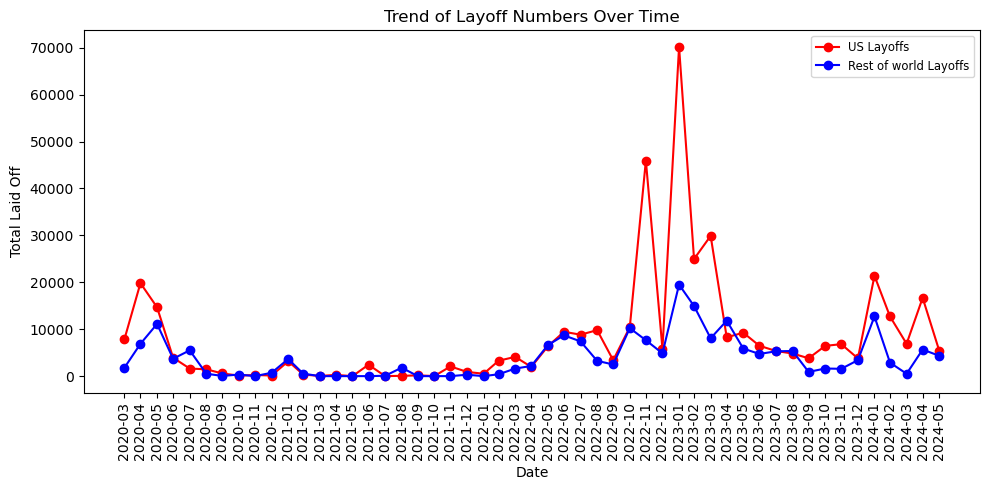

In [2]:
### Trend of lay off overtime - and specific months or periods of layoffs

# Group the data by month and sum the total_laid_off for each month
us_layoffs_trend = us_layoffs.set_index('date').resample('M')['total_laid_off'].sum()
us_layoffs_trend_Q = us_layoffs.set_index('date').resample('Q')['total_laid_off'].sum()

row_layoffs_trend = row_layoffs.set_index('date').resample('M')['total_laid_off'].sum()
row_layoffs_trend_Q = row_layoffs.set_index('date').resample('Q')['total_laid_off'].sum()


# Plot the trend graph
plt.figure(figsize=(10, 5))
plt.plot(us_layoffs_trend.index, us_layoffs_trend.values, marker='o', linestyle='-', color='red', label='US Layoffs')
plt.plot(row_layoffs_trend.index, row_layoffs_trend.values, marker='o', linestyle='-', color='blue', label='Rest of world Layoffs')

plt.title('Trend of Layoff Numbers Over Time')
plt.xlabel('Date')
plt.ylabel('Total Laid Off')
plt.legend(loc='upper right', fontsize='small')
plt.xticks(us_layoffs_trend.index, [date.strftime('%Y-%m') for date in us_layoffs_trend.index], rotation=90)
plt.tight_layout()
plt.show()



In [3]:
### Impact by Location: Which geographical areas (cities, countries, etc.) have had the most layoffs? Is there a correlation between location and the severity of layoffs?

# Analyzing by location (entire data set)
location_layoffs = us_layoffs.groupby('location')['total_laid_off'].sum().reset_index()
location_layoffs = location_layoffs.sort_values(by='total_laid_off', ascending=False).head(10)

# Analyzing by location 2020
us_layoffs_2020 = us_layoffs[(us_layoffs['date'].dt.year == 2020)] 
location_layoffs_2020 = us_layoffs_2020.groupby('location')['total_laid_off'].sum().reset_index()
location_layoffs_2020 = location_layoffs_2020.sort_values(by='total_laid_off', ascending=False).head(10)

# Analyzing by location 2021
us_layoffs_2021 = us_layoffs[(us_layoffs['date'].dt.year == 2021)] 
location_layoffs_2021 = us_layoffs_2021.groupby('location')['total_laid_off'].sum().reset_index()
location_layoffs_2021 = location_layoffs_2021.sort_values(by='total_laid_off', ascending=False).head(10)

# Analyzing by location 2022
us_layoffs_2022 = us_layoffs[(us_layoffs['date'].dt.year == 2022)] 
location_layoffs_2022 = us_layoffs_2022.groupby('location')['total_laid_off'].sum().reset_index()
location_layoffs_2022 = location_layoffs_2022.sort_values(by='total_laid_off', ascending=False).head(10)

# Analyzing by location 2023
us_layoffs_2023 = us_layoffs[(us_layoffs['date'].dt.year == 2023)] 
location_layoffs_2023 = us_layoffs_2023.groupby('location')['total_laid_off'].sum().reset_index()
location_layoffs_2023 = location_layoffs_2023.sort_values(by='total_laid_off', ascending=False).head(10)

# Analyzing by location 2024
us_layoffs_2024 = us_layoffs[(us_layoffs['date'].dt.year == 2024)] 
location_layoffs_2024 = us_layoffs_2024.groupby('location')['total_laid_off'].sum().reset_index()
location_layoffs_2024 = location_layoffs_2024.sort_values(by='total_laid_off', ascending=False).head(10)

location_layoffs

,location,total_laid_off
86,SF Bay Area,184021.0
95,Seattle,52562.0
72,New York City,35929.0
4,Austin,33545.0
13,Boston,16591.0
54,Los Angeles,10160.0
21,Chicago,8295.0
12,Boise,7275.0
90,San Diego,6100.0
79,Phoenix,5681.0


In [ ]:
### grpahs

# Visualize (entire data set)
fig, ax = plt.subplots()
location_layoffs.plot(kind='barh', x='location', y='total_laid_off', color='red', legend=False, ax=ax)
ax.set_title('TOP 10 Layoffs by Location (Entire Datat Set)')
ax.set_xlabel('Total Laid Off')
ax.set_ylabel('Location')
ax.invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

# Visualize (2020)
fig, ax = plt.subplots()
location_layoffs_2020.plot(kind='barh', x='location', y='total_laid_off', color='blue',  legend=False, ax=ax)
ax.set_title('2020')
ax.set_xlabel('Total Laid Off')
ax.set_ylabel('Location')
ax.invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

# Visualize (2021)
fig, ax = plt.subplots()
location_layoffs_2021.plot(kind='barh', x='location', y='total_laid_off', color='blue',  legend=False, ax=ax)
ax.set_title('2021')
ax.set_xlabel('Total Laid Off')
ax.set_ylabel('Location')
ax.invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

# Visualize (2022)
fig, ax = plt.subplots()
location_layoffs_2022.plot(kind='barh', x='location', y='total_laid_off', color='blue',  legend=False, ax=ax)
ax.set_title('2022')
ax.set_xlabel('Total Laid Off')
ax.set_ylabel('Location')
ax.invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

# Visualize (2023)
fig, ax = plt.subplots()
location_layoffs_2023.plot(kind='barh', x='location', y='total_laid_off', color='blue',  legend=False, ax=ax)
ax.set_title('2023')
ax.set_xlabel('Total Laid Off')
ax.set_ylabel('Location')
ax.invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

# Visualize (2024)
fig, ax = plt.subplots()
location_layoffs_2024.plot(kind='barh', x='location', y='total_laid_off', color='blue',  legend=False, ax=ax)
ax.set_title('2024')
ax.set_xlabel('Total Laid Off')
ax.set_ylabel('Location')
ax.invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

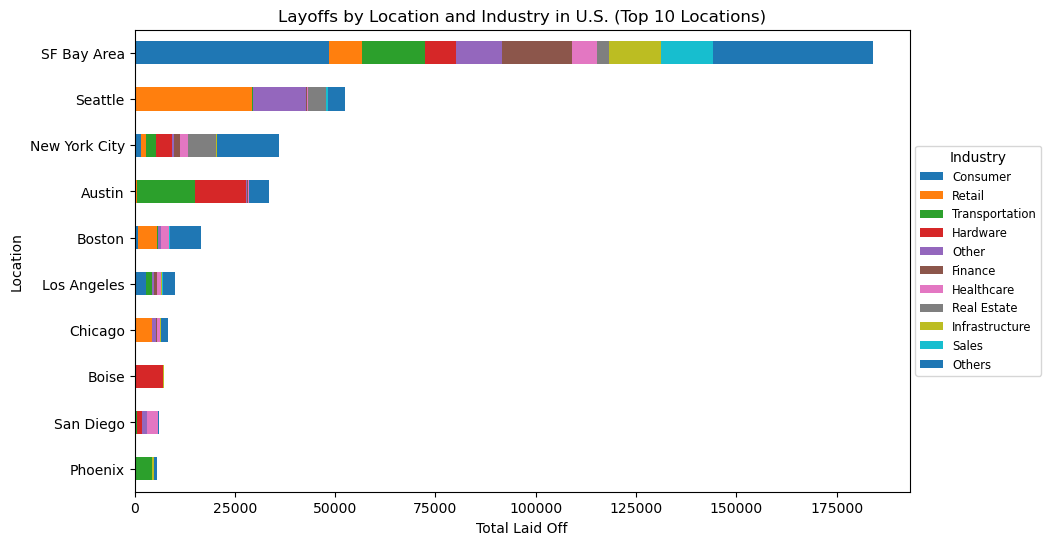

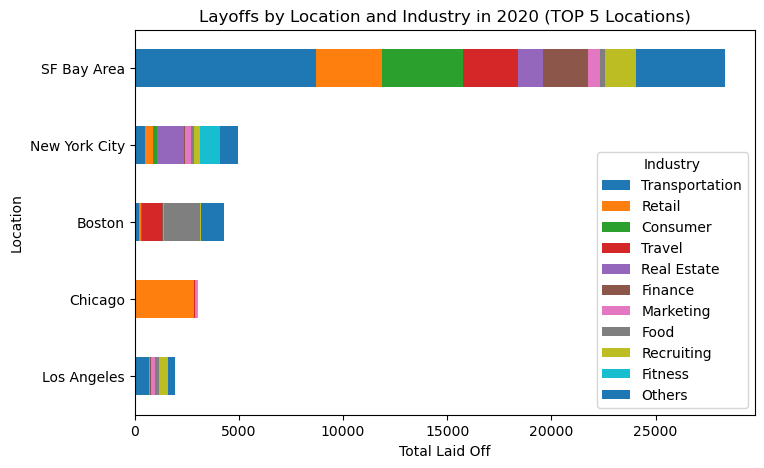

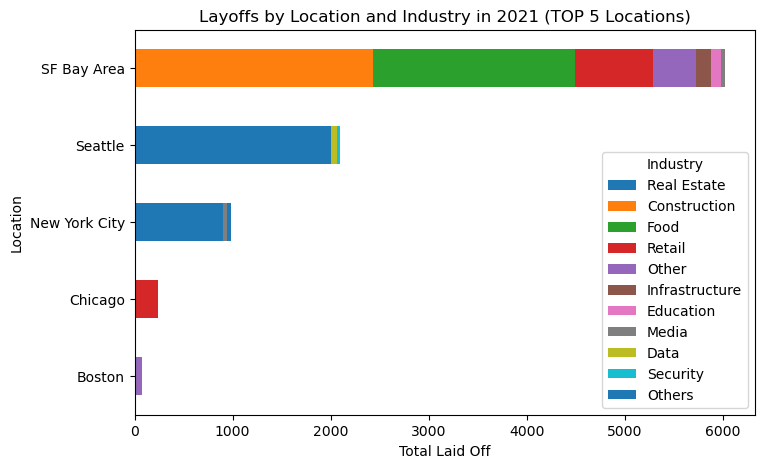

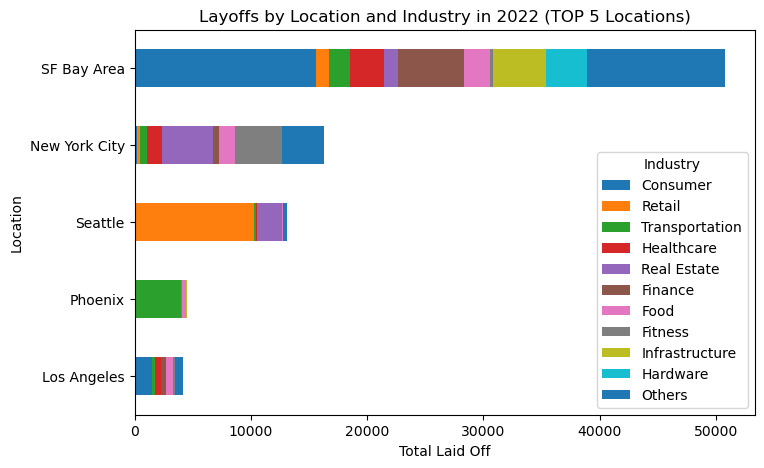

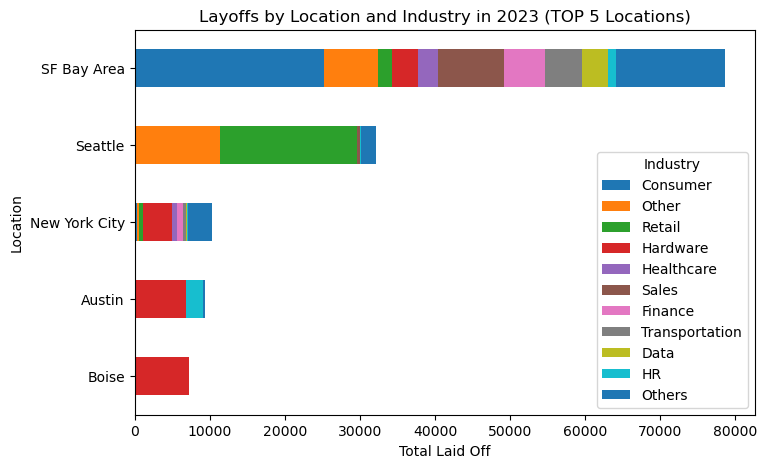

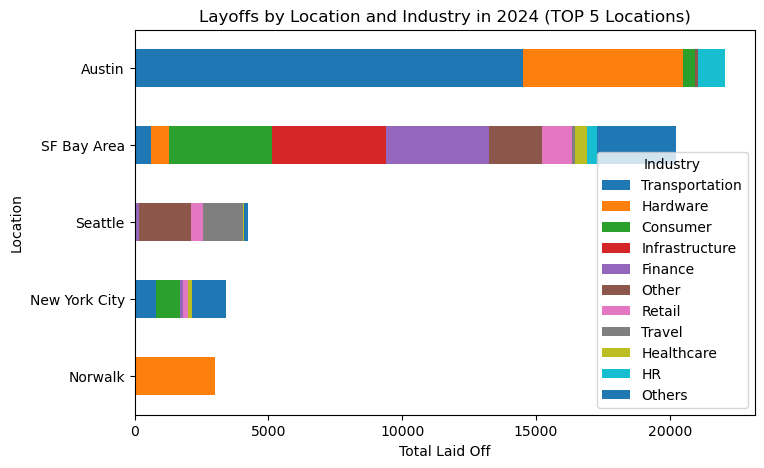

In [6]:
# Extract the year from the date column
us_layoffs['year'] = pd.to_datetime(us_layoffs['date']).dt.year

# Group the data by location and industry
us_grouped_entire = us_layoffs.groupby(['location', 'industry']).agg({'total_laid_off': 'sum'}).reset_index()

# Group the data by year, location, and industry, and sum the total_laid_off values
us_grouped_year = us_layoffs.groupby(['year', 'location', 'industry']).agg({'total_laid_off': 'sum'}).reset_index()




# Graph for entire data set by location stacked by industry
def plot_overall_sorted_stacked_bar_with_others(data, legend_max=10):
    pivot_df = data.pivot(index='location', columns='industry', values='total_laid_off').fillna(0)
    
    # Combine industries with fewer layoffs into "Others"
    sorted_columns = pivot_df.sum().sort_values(ascending=False)
    top_columns = sorted_columns.head(legend_max).index
    other_columns = sorted_columns.tail(len(sorted_columns) - legend_max).index
    
    pivot_df['Others'] = pivot_df[other_columns].sum(axis=1)
    pivot_df = pivot_df[top_columns.tolist() + ['Others']]
    
    # Sort locations by total layoffs
    pivot_df['Total'] = pivot_df.sum(axis=1)
    sorted_pivot_df = pivot_df.sort_values('Total', ascending=False).head(10).drop(columns='Total')
    
    sorted_pivot_df.plot(kind='barh', stacked=True, figsize=(10, 6))
    plt.title('Layoffs by Location and Industry in U.S. (Top 10 Locations)')
    plt.xlabel('Total Laid Off')
    plt.ylabel('Location')
    plt.legend(title='Industry', loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize='small')
    plt.gca().invert_yaxis()
    plt.show()
# Plot the graph for the entire dataset by location stacked by industry
plot_overall_sorted_stacked_bar_with_others(us_grouped_entire)


# Define a function to plot stacked bar graphs
def plot_top5_sorted_stacked_bar(data, year, legend_max=10):
    year_data = data[data['year'] == year]
    pivot_df = year_data.pivot(index='location', columns='industry', values='total_laid_off').fillna(0)

    # Combine industries with fewer layoffs into "Others"
    sorted_columns = pivot_df.sum().sort_values(ascending=False)
    top_columns = sorted_columns.head(legend_max).index
    other_columns = sorted_columns.tail(len(sorted_columns) - legend_max).index    
    pivot_df['Others'] = pivot_df[other_columns].sum(axis=1)
    pivot_df = pivot_df[top_columns.tolist() + ['Others']]

    # Sort locations by total layoffs    
    pivot_df['Total'] = pivot_df.sum(axis=1)
    sorted_pivot_df = pivot_df.sort_values('Total', ascending=False).head(5).drop(columns='Total')
    sorted_pivot_df.plot(kind='barh', stacked=True, figsize=(8, 5))
    plt.title(f'Layoffs by Location and Industry in {year} (TOP 5 Locations)')
    plt.xlabel('Total Laid Off')
    plt.ylabel('Location')
    plt.legend(title='Industry', loc='lower right')
    plt.gca().invert_yaxis()
    plt.show()

years = us_grouped_year['year'].unique()

# Plot sorted stacked bar graphs for each year from 2021 to 2024
for year in years:
    plot_top5_sorted_stacked_bar(us_grouped_year, year)